# Experimento 5 - Efeitos do In-Context Learning

**Objetivo**: Avaliar se a inclusão de exemplos de personalização no prompt do módulo Tailor (via estratégias de In-Context Learning) melhora a clareza, adequação e qualidade geral das respostas geradas.

**Metodologia**
* Escolher 2 perfis de usuário,
  * Para cada perfil, elaborar 5 perguntas,
    * Para cada pergunda, responder utilizando a abordagem de zero-shot, one-shot e few-shot.
    * Submeter o trio de respostas à LLM avaliadora.

Critérios de avaliação da LLM:
* UtilidadeGeral,
* Alinhamento com o Perfil,
* Clareza na Comunicação,
* Personalização Perceptível

Cada critério foi aplicado 20 vezes para cada resposta e uma média foi calculada.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Importação dos Resultados

O arquivo de resultados é composto pelas pontuações (scores) geradas pelo G-Eval para cada um dos 7 critérios elaborados.

A pergunta foi feita utilizando o padrão PersonaReAct para cada perfil listado abaixo e, para cada perfil, para cada abordagem (Zero, One e Few-shot).

Cada pontuação foi calculada 20 vezes e os seus resultados salvos nas listas ```scores_zero_shot```, ```scores_one_shot``` e ```scores_few_shot```.

## Torcedor do time

Pergunta: "Bruno Pacheco foi bem no jogo contra o Ceará no dia 1º de abril de 2023 ou deixou a desejar?"


In [2]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/results/evaluation_results_icl_with_repetitions_torcedor.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    for score_zero, score_one, score_few in zip(item['scores_zero_shot'], item['scores_one_shot'], item['scores_few_shot']):
        linhas.append({
            "pergunta": item["pergunta"],
            "perfil": item["perfil"],
            "criterio": item["criterio"],
            "scores_zero_shot": score_zero,
            "scores_one_shot": score_one,
            "scores_few_shot": score_few,
            "diferenca_one_zero": score_one - score_zero,
            "diferenca_few_zero": score_few - score_zero,
            "diferenca_few_one": score_few - score_one,
        })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,criterio,scores_zero_shot,scores_one_shot,scores_few_shot,diferenca_one_zero,diferenca_few_zero,diferenca_few_one
0,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.33,9.38,9.10,0.05,-0.23,-0.28
1,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.23,9.41,9.05,0.18,-0.18,-0.36
2,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.02,9.38,9.03,0.36,0.01,-0.35
3,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.19,9.16,9.09,-0.03,-0.10,-0.07
4,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,AdequacaoAoPerfil,9.05,9.35,9.03,0.30,-0.02,-0.32


In [3]:
agrupado = df.groupby("criterio")[["scores_zero_shot", "scores_one_shot", "scores_few_shot"]].agg(["mean", "std"]).round(2)
agrupado.columns = ['ZeroShot_Média', 'ZeroShot_DP', 'OneShot_Média', 'OneShot_DP', 'FewShot_Média', 'FewShot_DP']
agrupado.reset_index(inplace=True)
agrupado

,criterio,ZeroShot_Média,ZeroShot_DP,OneShot_Média,OneShot_DP,FewShot_Média,FewShot_DP
0,AdequacaoAoPerfil,9.13,0.11,9.36,0.06,9.06,0.04
1,AusenciaDeAlucinacoes,1.50,0.29,0.86,0.44,0.77,0.36
2,ClarezaNaComunicacao,9.30,0.11,9.33,0.11,9.10,0.10
3,PersonalizacaoExplicita,8.80,0.06,9.00,0.04,8.85,0.04
4,SelecaoDeDadosRelevantes,9.61,0.09,9.55,0.10,9.30,0.11
5,TomEEstiloAdequado,7.42,0.13,8.61,0.12,8.34,0.34
6,UsoDeInformacoesRelevantes,9.47,0.04,9.38,0.09,9.25,0.10


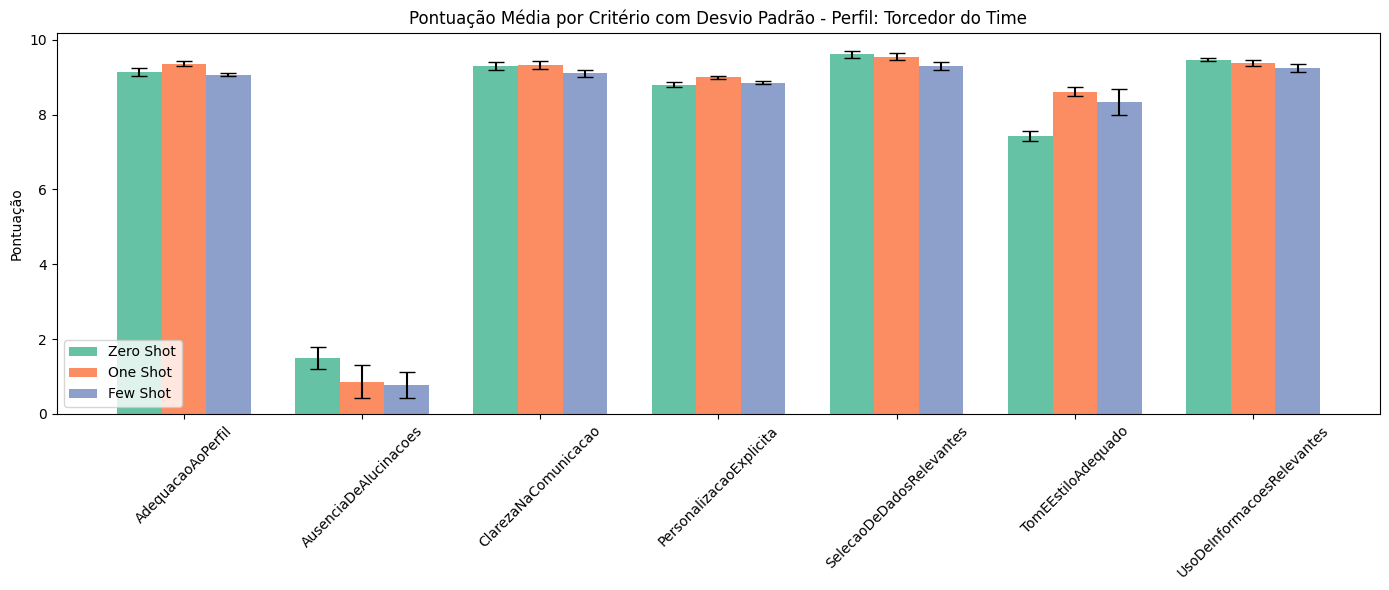

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que você tenha um DataFrame chamado agrupado
criterios = agrupado['criterio']
x = np.arange(len(criterios))  # Índices para cada critério

# Define a largura das barras
largura = 0.25

# Cria a figura
fig, ax = plt.subplots(figsize=(14, 6))

# Barras para Zero Shot
ax.bar(
    x - largura,
    agrupado['ZeroShot_Média'],
    width=largura,
    yerr=agrupado['ZeroShot_DP'],
    capsize=6,
    label='Zero Shot',
    color="#66c2a5"
)

# Barras para One Shot
ax.bar(
    x,
    agrupado['OneShot_Média'],
    width=largura,
    yerr=agrupado['OneShot_DP'],
    capsize=6,
    label='One Shot',
    color="#fc8d62"
)

# Barras para Few Shot
ax.bar(
    x + largura,
    agrupado['FewShot_Média'],
    width=largura,
    yerr=agrupado['FewShot_DP'],
    capsize=6,
    label='Few Shot',
    color="#8da0cb"
)

# Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(criterios, rotation=45)
ax.set_ylabel("Pontuação")
ax.set_title("Pontuação Média por Critério com Desvio Padrão - Perfil: Torcedor do Time")
ax.legend()
plt.tight_layout()
plt.show()

In [8]:
from scipy.stats import ttest_rel
import pandas as pd

resultados_teste = []

for criterio in df["criterio"].unique():
    subset = df[df["criterio"] == criterio]

    # Comparação: Few-shot vs Zero-shot
    stat_fz, p_fz = ttest_rel(subset["scores_few_shot"], subset["scores_zero_shot"])
    resultados_teste.append({
        "Critério": criterio,
        "Comparação": "Few-shot vs Zero-shot",
        "Média A": round(subset["scores_few_shot"].mean(), 2),
        "Média B": round(subset["scores_zero_shot"].mean(), 2),
        "Valor-p": p_fz,
        "Significativo (α=0.05)": "✅" if p_fz < 0.05 else "❌"
    })

    # Comparação: Few-shot vs One-shot
    stat_fo, p_fo = ttest_rel(subset["scores_few_shot"], subset["scores_one_shot"])
    resultados_teste.append({
        "Critério": criterio,
        "Comparação": "Few-shot vs One-shot",
        "Média A": round(subset["scores_few_shot"].mean(), 2),
        "Média B": round(subset["scores_one_shot"].mean(), 2),
        "Valor-p": p_fo,
        "Significativo (α=0.05)": "✅" if p_fo < 0.05 else "❌"
    })

    # Comparação: One-shot vs Zero-shot
    stat_oz, p_oz = ttest_rel(subset["scores_one_shot"], subset["scores_zero_shot"])
    resultados_teste.append({
        "Critério": criterio,
        "Comparação": "One-shot vs Zero-shot",
        "Média A": round(subset["scores_one_shot"].mean(), 2),
        "Média B": round(subset["scores_zero_shot"].mean(), 2),
        "Valor-p": p_oz,
        "Significativo (α=0.05)": "✅" if p_oz < 0.05 else "❌"
    })

# Exibe como DataFrame
pd.DataFrame(resultados_teste)

,Critério,Comparação,Média A,Média B,Valor-p,Significativo (α=0.05)
0,AdequacaoAoPerfil,Few-shot vs Zero-shot,9.06,9.13,1.143834e-02,✅
1,AdequacaoAoPerfil,Few-shot vs One-shot,9.06,9.36,3.203090e-13,✅
2,AdequacaoAoPerfil,One-shot vs Zero-shot,9.36,9.13,1.362318e-07,✅
3,UsoDeInformacoesRelevantes,Few-shot vs Zero-shot,9.25,9.47,2.060731e-08,✅
4,UsoDeInformacoesRelevantes,Few-shot vs One-shot,9.25,9.38,2.486128e-04,✅
5,UsoDeInformacoesRelevantes,One-shot vs Zero-shot,9.38,9.47,8.801188e-04,✅
6,TomEEstiloAdequado,Few-shot vs Zero-shot,8.34,7.42,8.208152e-11,✅
7,TomEEstiloAdequado,Few-shot vs One-shot,8.34,8.61,5.818602e-03,✅
8,TomEEstiloAdequado,One-shot vs Zero-shot,8.61,7.42,1.115615e-17,✅
9,ClarezaNaComunicacao,Few-shot vs Zero-shot,9.10,9.30,1.395022e-06,✅


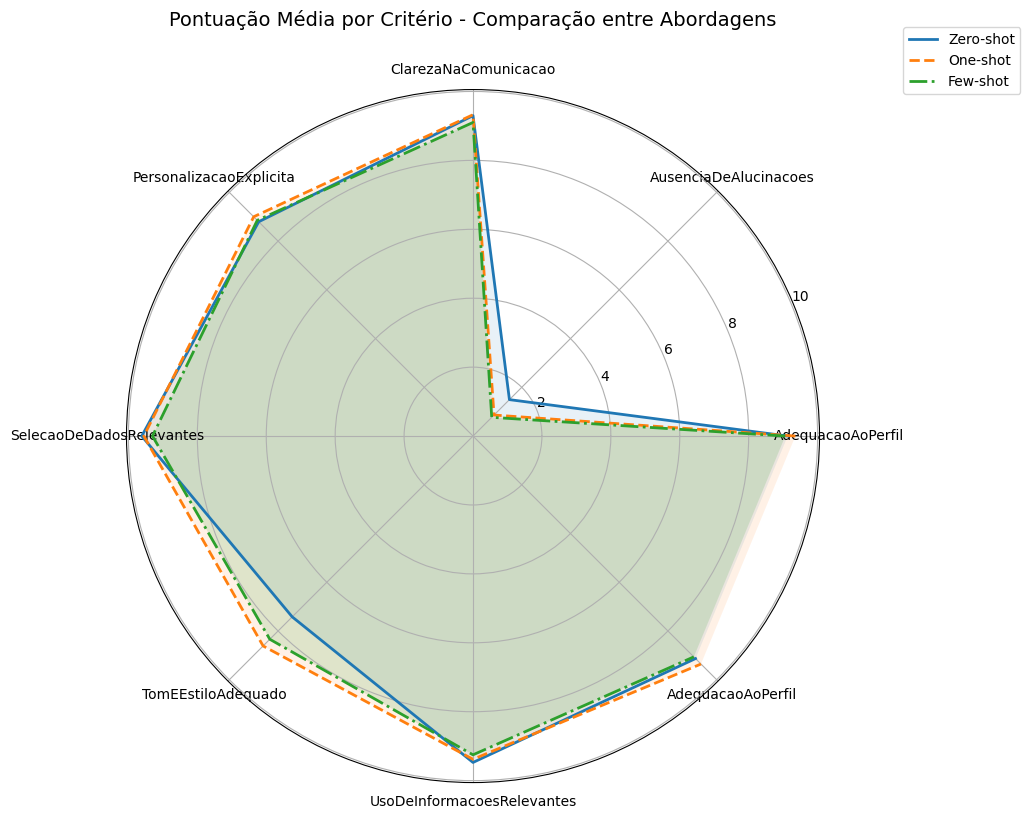

In [10]:
import matplotlib.pyplot as plt
from math import pi

# Calcular médias por critério
media_por_criterio = df.groupby("criterio")[["scores_zero_shot", "scores_one_shot", "scores_few_shot"]].mean().reset_index()

# Categorias (critérios)
categorias = media_por_criterio["criterio"].tolist()

# Valores de cada abordagem
valores_zero = media_por_criterio["scores_zero_shot"].tolist()
valores_one = media_por_criterio["scores_one_shot"].tolist()
valores_few = media_por_criterio["scores_few_shot"].tolist()

# Fechar o círculo do radar
categorias += [categorias[0]]
valores_zero += [valores_zero[0]]
valores_one += [valores_one[0]]
valores_few += [valores_few[0]]

# Ângulos para cada critério
num_vars = len(categorias)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

# Criar figura
plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)

# Plotar as três abordagens
ax.plot(angles, valores_zero, linewidth=2, linestyle='solid', label='Zero-shot')
ax.fill(angles, valores_zero, alpha=0.1)

ax.plot(angles, valores_one, linewidth=2, linestyle='dashed', label='One-shot')
ax.fill(angles, valores_one, alpha=0.1)

ax.plot(angles, valores_few, linewidth=2, linestyle='dashdot', label='Few-shot')
ax.fill(angles, valores_few, alpha=0.15)

# Adicionar labels
ax.set_xticks(angles)
ax.set_xticklabels(categorias, fontsize=10)
ax.set_title("Pontuação Média por Critério - Comparação entre Abordagens", size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

# Análise de Variação Textual entre Zero-shot, One-shot e Few-shot

In [21]:
import pandas as pd
import numpy as np
import nltk
from bert_score import score as bert_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Substitua pelo caminho do seu DataFrame, se necessário
# df = pd.read_csv("caminho_para_arquivo.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavolgcr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gustavolgcr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/gustavolgcr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
# Substitua pelo caminho correto
path_json = "/Users/gustavolgcr/doutorado/implementacoes/experiments/src/data/questions_and_answers_icl_torcedor.json"

with open(path_json, 'r', encoding='utf-8') as f:
    dados = json.load(f)

# Transformar em DataFrame
linhas = []
for item in dados:
    linhas.append({
        "pergunta": item["pergunta"],
        "perfil": item["perfil"],
        "resposta_zero_shot": item["resposta_zero_shot"],
        "resposta_one_shot": item["resposta_one_shot"],
        "resposta_few_shot": item["resposta_few_shot"],
    })

df = pd.DataFrame(linhas)
df.head()

,pergunta,perfil,resposta_zero_shot,resposta_one_shot,resposta_few_shot
0,Bruno Pacheco foi bem no jogo contra o Ceará n...,Torcedor do Time,Bruno Pacheco teve um desempenho abaixo do esp...,Bruno Pacheco não teve uma atuação destacada n...,Bruno Pacheco teve um desempenho abaixo do esp...


Funções de cálculo das métricas

In [19]:
def compute_jaccard(s1, s2):
    tokens1 = set(nltk.word_tokenize(s1.lower()))
    tokens2 = set(nltk.word_tokenize(s2.lower()))
    intersection = tokens1.intersection(tokens2)
    union = tokens1.union(tokens2)
    return len(intersection) / len(union) if union else 0

def compute_bleu(s1, s2):
    reference = nltk.word_tokenize(s1.lower())
    candidate = nltk.word_tokenize(s2.lower())
    return sentence_bleu([reference], candidate, smoothing_function=SmoothingFunction().method1)

def compute_rouge(s1, s2):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    return scorer.score(s1, s2)['rougeL'].fmeasure

def compute_edit_distance(s1, s2):
    return 1 - SequenceMatcher(None, s1, s2).ratio()

In [22]:
pares = [
    ("Zero vs One", "resposta_zero_shot", "resposta_one_shot"),
    ("Zero vs Few", "resposta_zero_shot", "resposta_few_shot"),
    ("One vs Few", "resposta_one_shot", "resposta_few_shot")
]

resultados = []

for nome, col1, col2 in pares:
    for i, row in df.iterrows():
        s1, s2 = row[col1], row[col2]
        
        bert_precision, _, _ = bert_score([s1], [s2], lang='pt', rescale_with_baseline=True)
        resultados.append({
            "par": nome,
            "BERTScore": round(bert_precision[0].item(), 4),
            "BLEU": round(compute_bleu(s1, s2), 4),
            "ROUGE_L": round(compute_rouge(s1, s2), 4),
            "Jaccard": round(compute_jaccard(s1, s2), 4),
            "Edit_Dist": round(compute_edit_distance(s1, s2), 4)
        })

In [23]:
resultados

[{'par': 'Zero vs One',
  'BERTScore': 0.5332,
  'BLEU': 0.394,
  'ROUGE_L': 0.5046,
  'Jaccard': 0.5312,
  'Edit_Dist': 0.7257},
 {'par': 'Zero vs Few',
  'BERTScore': 0.5016,
  'BLEU': 0.4452,
  'ROUGE_L': 0.5581,
  'Jaccard': 0.5435,
  'Edit_Dist': 0.5541},
 {'par': 'One vs Few',
  'BERTScore': 0.5832,
  'BLEU': 0.4456,
  'ROUGE_L': 0.5148,
  'Jaccard': 0.5049,
  'Edit_Dist': 0.6607}]

In [24]:
resultados_df = pd.DataFrame(resultados)

# Estatísticas descritivas por tipo de comparação
summary = resultados_df.groupby("par").agg({
    "BERTScore": ["mean", "std"],
    "BLEU": ["mean", "std"],
    "ROUGE_L": ["mean", "std"],
    "Jaccard": ["mean", "std"],
    "Edit_Dist": ["mean", "std"]
}).round(4)


/var/folders/57/zxs7x8nd6g38q929k2lys2n80000gn/T/ipykernel_92036/1819391610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=resultados_df, x="par", y="BERTScore", palette="Set2")


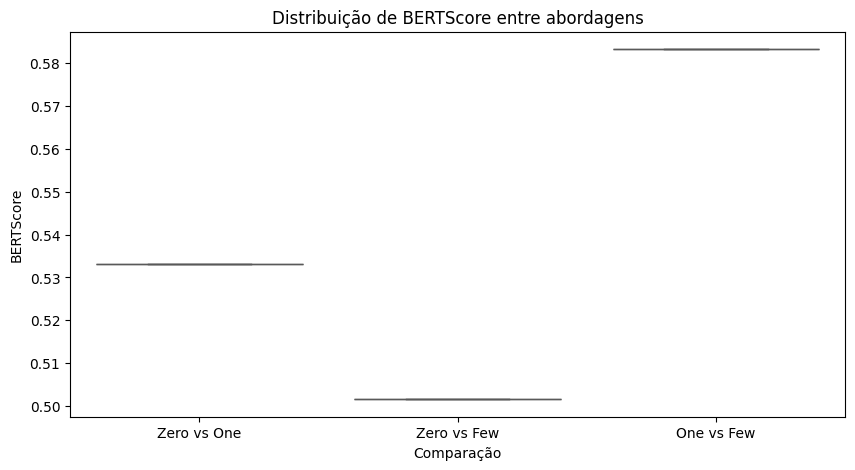

BERTScore        BLEU     ROUGE_L     Jaccard     Edit_Dist    
                 mean std    mean std    mean std    mean std      mean std
par                                                                        
One vs Few     0.5832 NaN  0.4456 NaN  0.5148 NaN  0.5049 NaN    0.6607 NaN
Zero vs Few    0.5016 NaN  0.4452 NaN  0.5581 NaN  0.5435 NaN    0.5541 NaN
Zero vs One    0.5332 NaN  0.3940 NaN  0.5046 NaN  0.5312 NaN    0.7257 NaN

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de comparação BERTScore
plt.figure(figsize=(10, 5))
sns.boxplot(data=resultados_df, x="par", y="BERTScore", palette="Set2")
plt.title("Distribuição de BERTScore entre abordagens")
plt.ylabel("BERTScore")
plt.xlabel("Comparação")
plt.show()

summary